#### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
The company wants to know:
    Which variables are significant in predicting the price of a house, and
    How well those variables describe the price of a house.

#### Business Goal
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market. Ridge and Lasso Regeression

In [1]:
# importing all the important
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset
pd.set_option('display.max_columns', 100)
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.shape

(1460, 81)

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# deleteing Id column as it is not required
df = df.drop('Id',axis=1)

In [7]:
# Checking null values
a = df.isnull().sum()/len(df.index)
print(round(a*100,2))

MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 80, dtype: float64


In [8]:
#### From the data dictionary, it is clear that Null values means missing facility. So can't drop the missing values. We have to fill them with suitable values.

c = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in c:
    df[i].fillna("blank", inplace=True)

In [9]:
# Checking null values again
a = df.isnull().sum()/len(df.index)
print(round(a*100,2))

MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 80, dtype: float64


#### Handling of missing value in remaining columns

In [10]:
df.LotFrontage.describe(percentiles=[0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
20%        53.000000
30%        60.000000
40%        63.000000
50%        69.000000
60%        74.000000
70%        79.000000
80%        85.000000
90%        96.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [11]:
# Filling with median
df['LotFrontage'] = df.LotFrontage.fillna(69)

In [12]:
df.LotFrontage.describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [13]:
df.GarageYrBlt.describe(percentiles=[0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
20%      1957.000000
30%      1965.000000
40%      1973.000000
50%      1980.000000
60%      1993.000000
70%      1999.000000
80%      2004.000000
90%      2006.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [14]:
# Filling with median
df['GarageYrBlt'] = df.GarageYrBlt.fillna(1980.000000)

In [15]:
df.GarageYrBlt.describe()

count    1460.000000
mean     1978.589041
std        23.997022
min      1900.000000
25%      1962.000000
50%      1980.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [16]:
df.MasVnrArea.describe(percentiles=[0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%        16.000000
70%       117.000000
80%       206.000000
90%       335.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [17]:
# Filling with median
df['MasVnrArea'] = df.MasVnrArea.fillna(0)

In [18]:
df.MasVnrArea.describe()

count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [19]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,blank,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,blank,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,blank,blank,blank,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,blank,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,blank,blank,blank,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,blank,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,blank,blank,blank,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,blank,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,blank,blank,blank,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,blank,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,blank,blank,blank,0,12,2008,WD,Normal,250000


In [20]:
df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [21]:
# Since max values are "SBrkr". So better to remove it.
df = df.drop('Electrical', axis=1)

In [22]:
df.shape

(1460, 79)

## Univariate Analysis

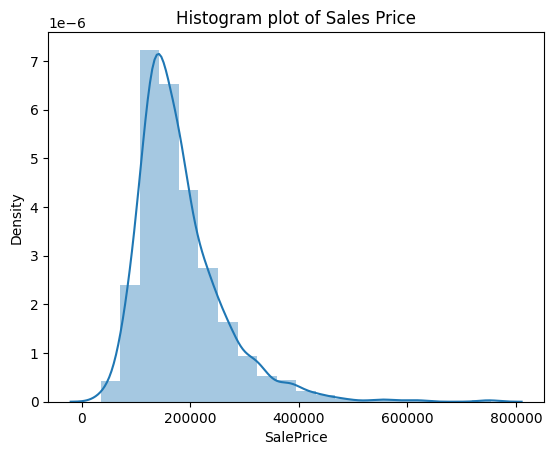

In [23]:
sns.distplot(df.SalePrice, bins=20)
plt.title("Histogram plot of Sales Price")
plt.show()

In [24]:
# From the above graph, it is clear that normal distribution is little bit tilted. So there is a need to correct it using log method
df['SalePrice']=np.log1p(df['SalePrice'])

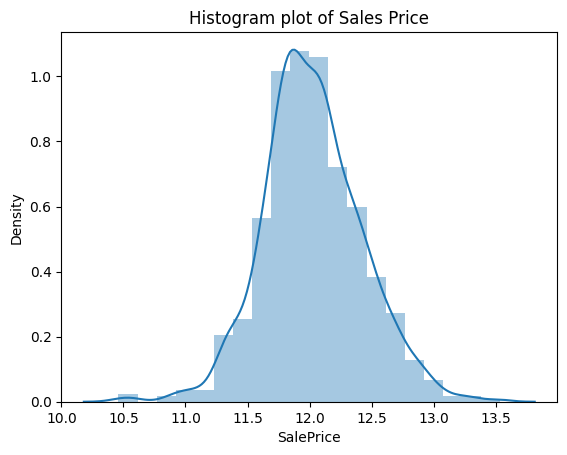

In [25]:
sns.distplot(df.SalePrice, bins=20)
plt.title("Histogram plot of Sales Price")
plt.show()
# Now it is much better normal distribution.

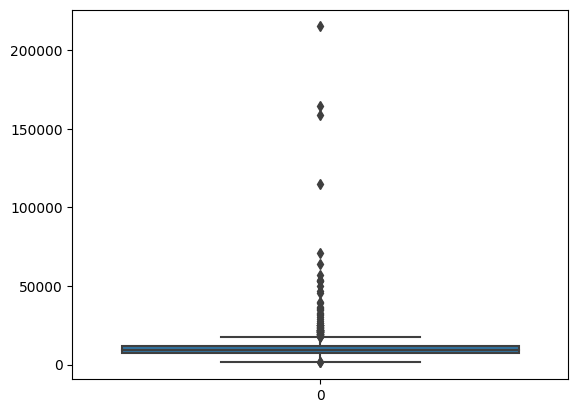

In [26]:
sns.boxplot(df.LotArea)
plt.show()
# From the boxplot, it is clear that there are a number of outliers present in the data.

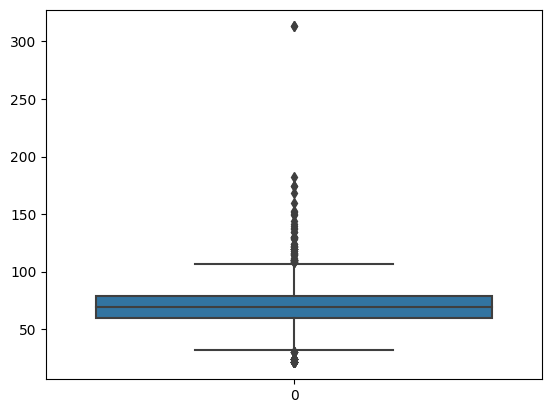

In [27]:
sns.boxplot(df.LotFrontage)
plt.show()
# From the boxplot, it is clear that there are a number of outliers present in the data.

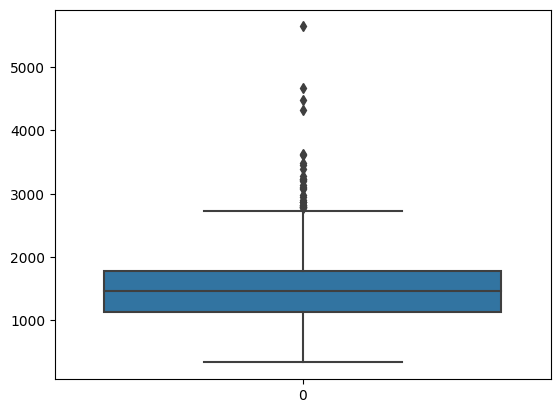

In [28]:
sns.boxplot(df.GrLivArea)
plt.show()

In [29]:
def remove_outliers(x,y):
    q1 = x[y].quantile(0.25)
    q3 = x[y].quantile(0.75)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    out= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return out

In [30]:
# Removing outliers
df = remove_outliers(df,'GrLivArea')

In [31]:
# Removing outliers
df = remove_outliers(df,'LotFrontage')

In [32]:
# Removing outliers
df = remove_outliers(df,'LotArea')

In [33]:
df.shape

(1247, 79)

## Bivariate Analysis

In [34]:
# Since it is a large dataset, so better to filter int and float saparately
data = df.select_dtypes(include=['float64', 'int64'])

In [35]:
correlation_table = data.corr()
correlation_table

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.280946,-0.302188,0.095981,-0.064931,0.018472,0.057205,0.001613,-0.041357,-0.089279,-0.108127,-0.197649,-0.158216,0.306984,0.025216,0.171109,0.032684,0.008009,0.181903,0.127234,0.008148,0.332277,0.120496,0.040535,0.086279,0.020970,-0.032684,0.008847,0.028565,0.027530,-0.032267,-0.000472,-0.005275,-0.017672,0.000937,-0.030709,0.020893
LotFrontage,-0.280946,1.000000,0.512906,0.239624,-0.054314,0.208170,0.074771,0.283924,0.148418,0.060520,0.094005,0.284943,0.319329,0.100507,-0.048667,0.330032,0.047050,-0.004913,0.184709,0.152726,0.281405,0.020483,0.319600,0.158093,0.111555,0.301497,0.322305,0.086013,0.113648,-0.067601,0.090172,0.055534,0.025622,0.005532,0.036017,0.007184,0.359607
LotArea,-0.302188,0.512906,1.000000,0.188841,-0.032912,0.127023,0.051077,0.193517,0.172780,0.068988,0.041613,0.256167,0.322805,0.131262,-0.042620,0.362039,0.062889,0.039514,0.177275,0.177888,0.294993,-0.019403,0.346602,0.237595,0.047237,0.259591,0.288638,0.148697,0.110988,-0.063117,0.055772,0.085007,0.010887,0.042694,0.001100,-0.024882,0.363011
OverallQual,0.095981,0.239624,0.188841,1.000000,-0.116119,0.600409,0.549536,0.376689,0.204382,-0.069081,0.304055,0.527225,0.445335,0.257584,-0.059212,0.571149,0.103409,-0.042793,0.542260,0.265960,0.076394,-0.183346,0.388068,0.390767,0.520263,0.593105,0.548813,0.215221,0.311771,-0.138850,0.035180,0.060226,-0.000916,-0.022686,0.087131,-0.000924,0.824197
OverallCond,-0.064931,-0.054314,-0.032912,-0.116119,1.000000,-0.375284,0.071298,-0.131840,-0.042057,0.056268,-0.151583,-0.190850,-0.190531,0.014539,0.046082,-0.125492,-0.051068,0.132537,-0.241141,-0.055661,-0.005054,-0.089578,-0.090069,-0.041648,-0.313672,-0.194094,-0.156549,-0.019420,-0.060794,0.104754,0.012386,0.040751,0.014401,0.088186,-0.012879,0.033212,-0.066646
YearBuilt,0.018472,0.208170,0.127023,0.600409,-0.375284,1.000000,0.603095,0.305361,0.268472,-0.047659,0.157645,0.441706,0.341294,-0.000615,-0.155349,0.241951,0.206419,-0.029956,0.511305,0.237242,-0.058272,-0.165234,0.114532,0.180821,0.778772,0.570743,0.525409,0.236704,0.228199,-0.419581,0.035334,-0.023913,0.006528,-0.037425,0.031460,0.004885,0.658676
YearRemodAdd,0.057205,0.074771,0.051077,0.549536,0.071298,0.603095,1.000000,0.154731,0.131538,-0.061662,0.171259,0.305737,0.241953,0.118287,-0.096278,0.284115,0.137694,0.003655,0.436803,0.183562,-0.059300,-0.165884,0.171283,0.116070,0.615606,0.427678,0.387266,0.219384,0.240739,-0.204003,0.047525,-0.034215,0.008171,0.001088,0.029430,0.057448,0.594750
MasVnrArea,0.001613,0.283924,0.193517,0.376689,-0.131840,0.305361,0.154731,1.000000,0.246554,-0.055612,0.091365,0.342068,0.334730,0.108487,-0.060270,0.348036,0.094835,0.019589,0.247248,0.175204,0.090720,-0.019254,0.255780,0.265169,0.228555,0.358126,0.360092,0.126295,0.128825,-0.119213,0.024508,0.095592,-0.009802,-0.026397,0.018721,0.008792,0.425167
BsmtFinSF1,-0.041357,0.148418,0.172780,0.204382,-0.042057,0.268472,0.131538,0.246554,1.000000,-0.053710,-0.546907,0.438609,0.364449,-0.186602,-0.067944,0.093011,0.649610,0.079706,0.038926,0.008981,-0.115001,-0.087530,-0.020215,0.198513,0.168163,0.202676,0.244086,0.201743,0.055077,-0.139275,0.030909,0.078285,0.016397,0.001664,0.010351,0.016272,0.368052
BsmtFinSF2,-0.089279,0.060520,0.068988,-0.069081,0.056268,-0.047659,-0.061662,-0.055612,-0.053710,1.000000,-0.201120,0.102430,0.083005,-0.104743,0.005464,-0.035256,0.146471,0.073763,-0.096373,-0.047040,0.002551,-0.041635,-0.053576,0.011773,-0.082056,-0.043892,-0.015405,0.099025,-0.005445,0.023408,-0.030338,0.040150,0.042197,-0.015493,-0.023221,0.036152,-0.011507


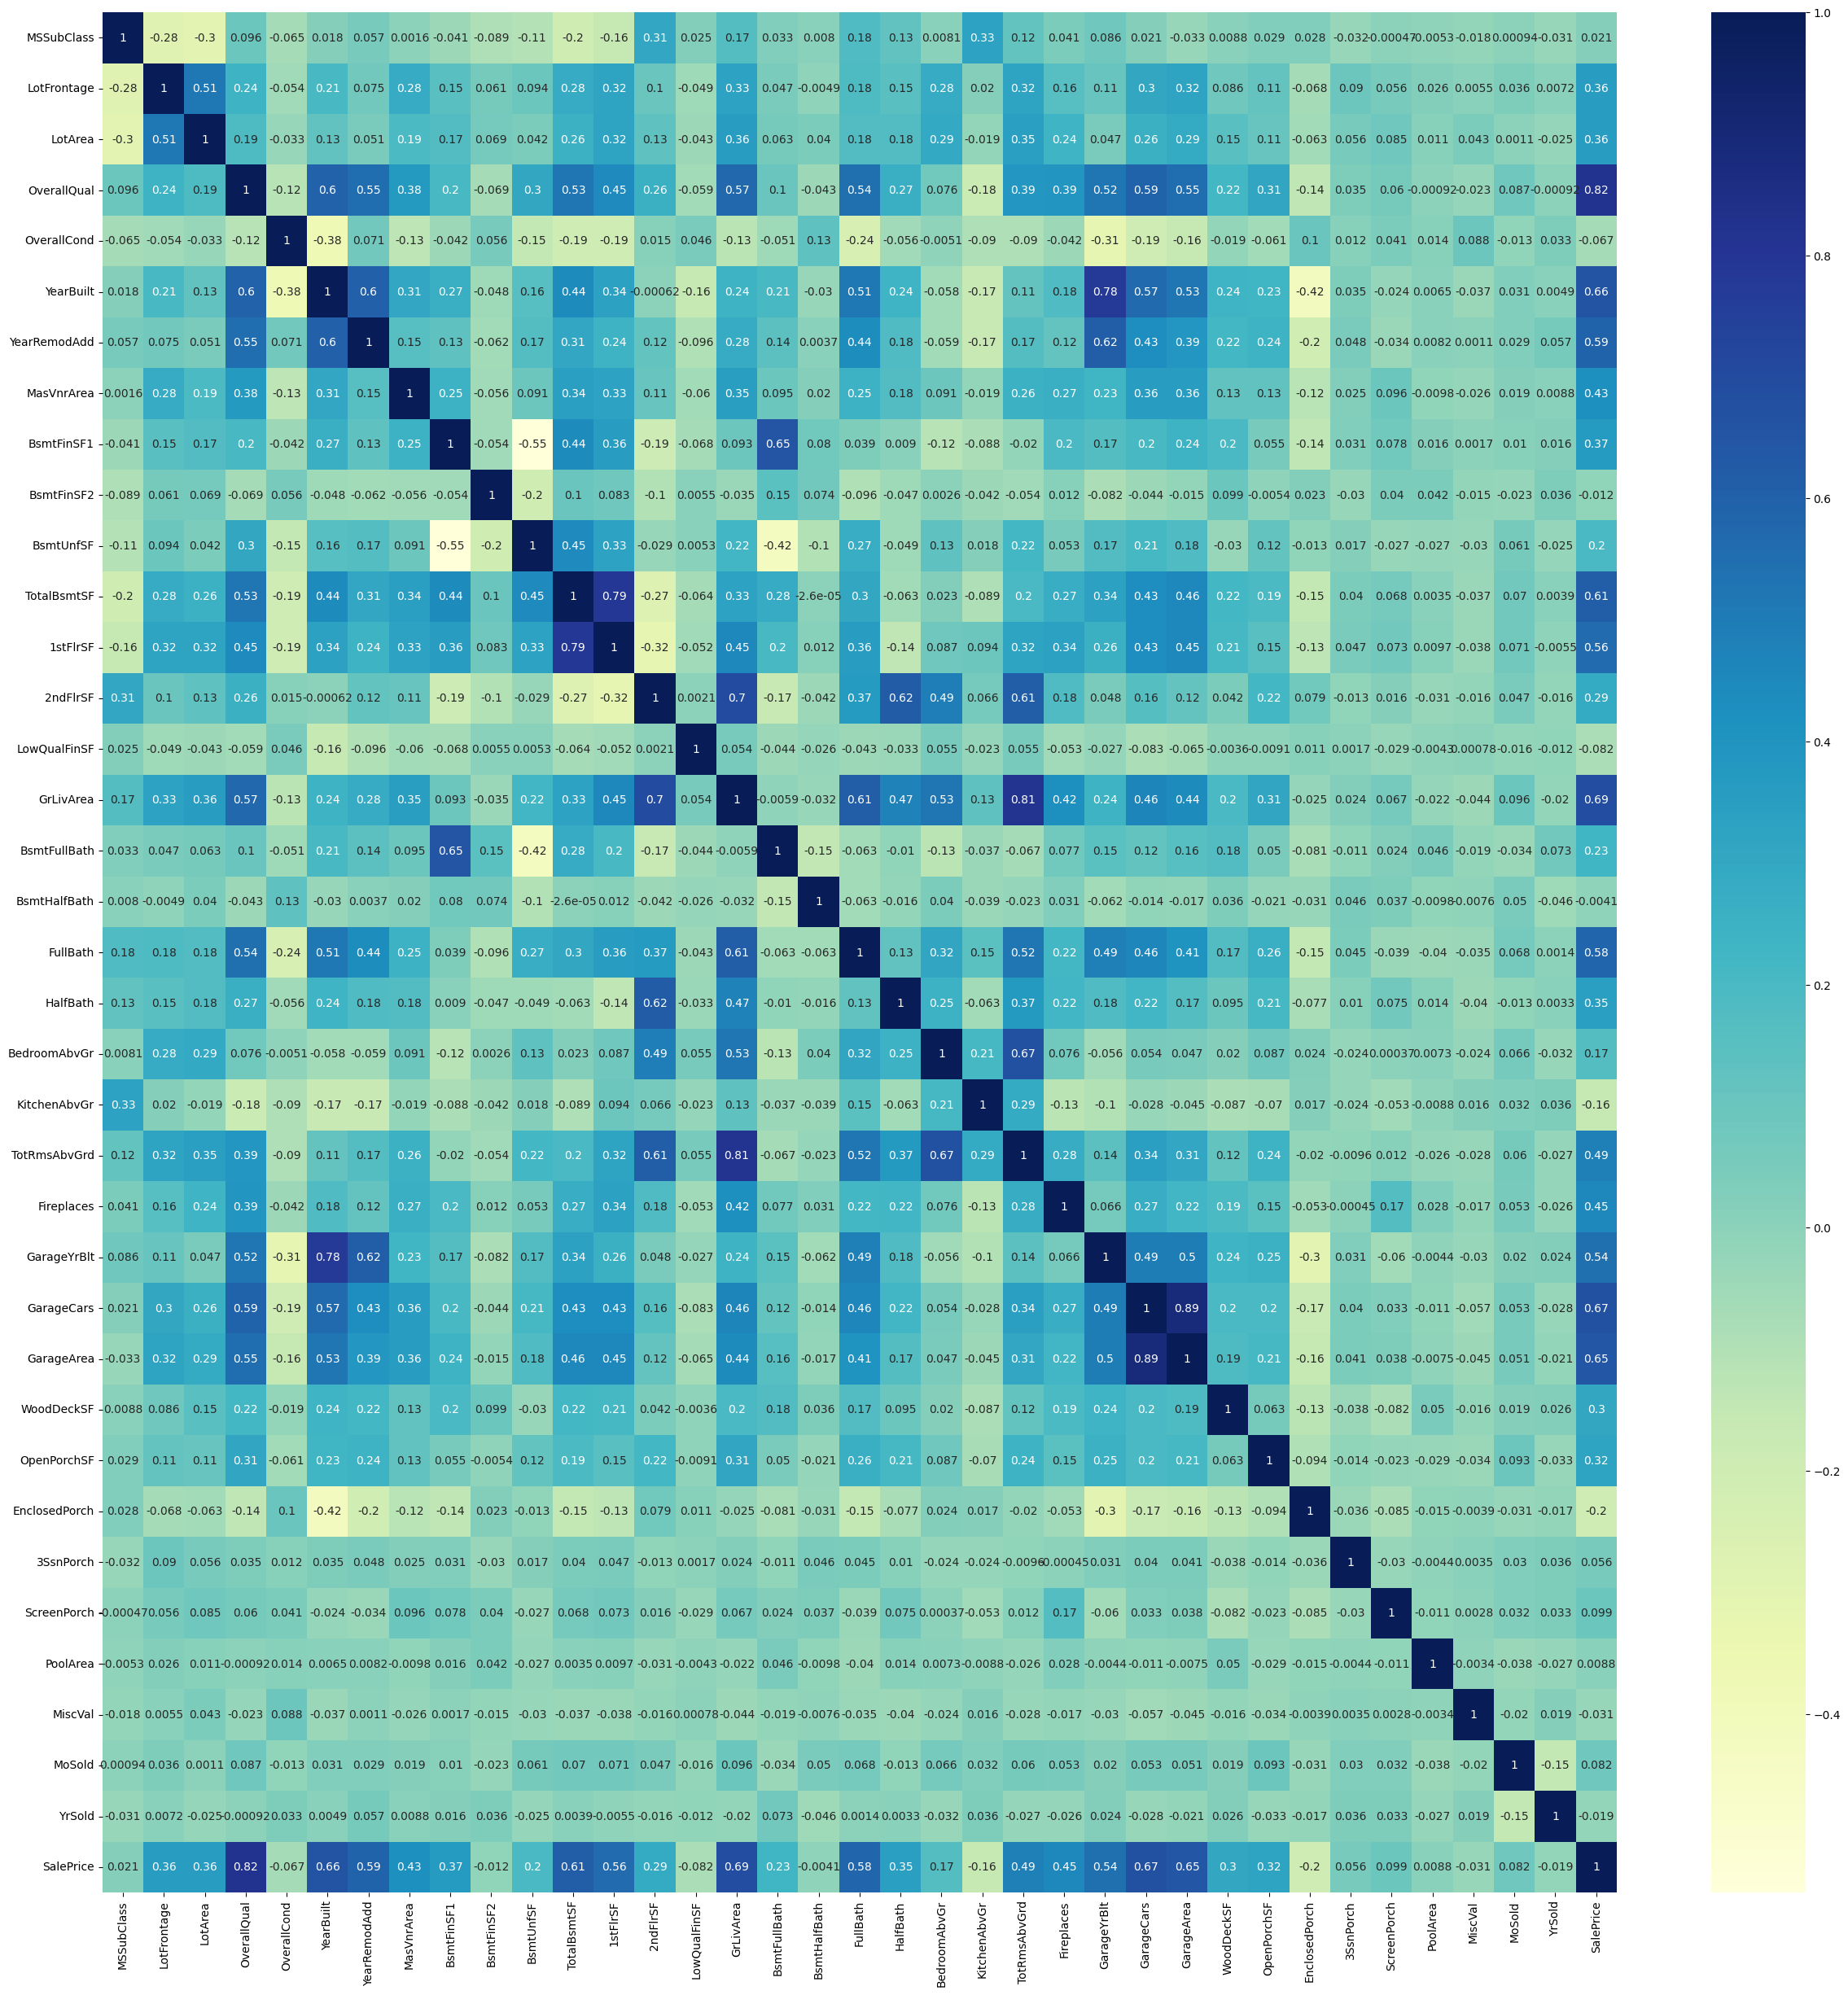

In [36]:
# plotting correlations on a heatmap
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

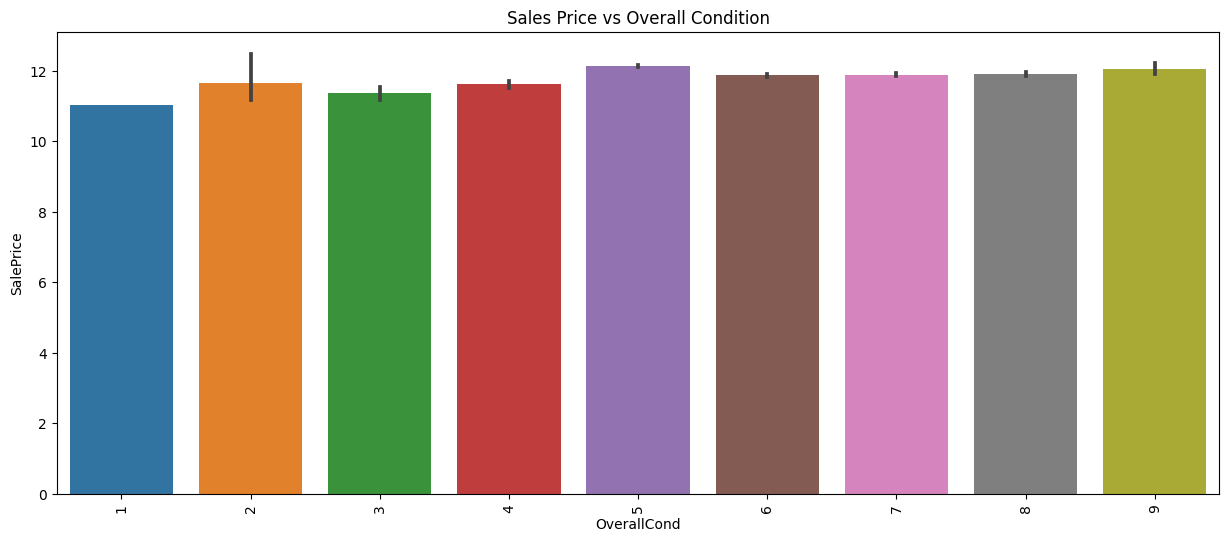

In [37]:
plt.figure(figsize=(15, 6))
sns.barplot(x="OverallCond", y="SalePrice", data= df)
plt.title("Sales Price vs Overall Condition")
plt.xticks(rotation=90)
plt.show()

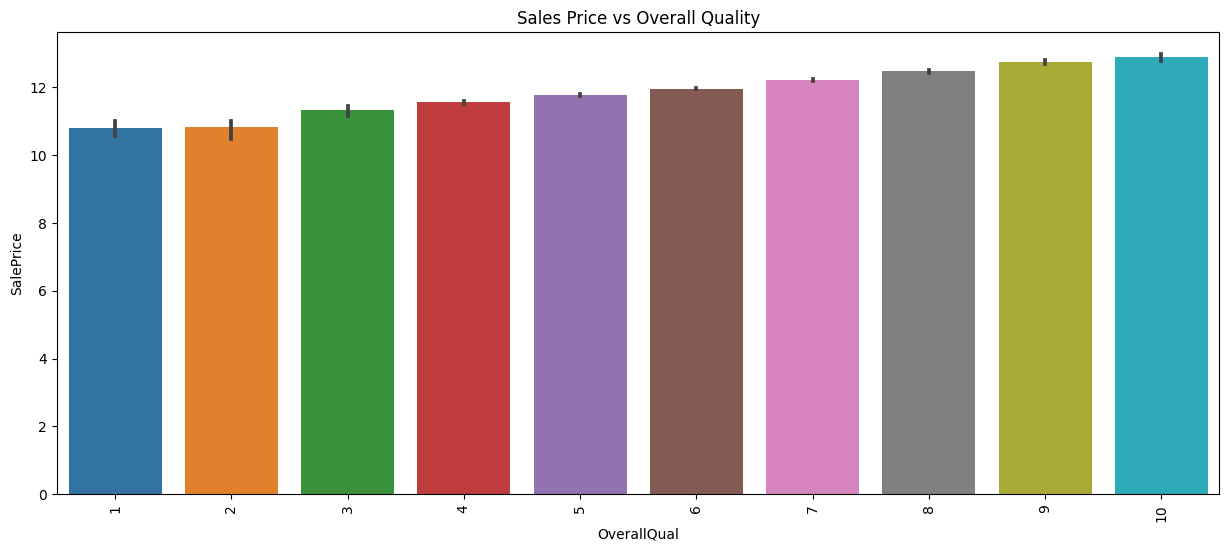

In [38]:
plt.figure(figsize=(15, 6))
sns.barplot(x="OverallQual", y="SalePrice", data= df)
plt.title("Sales Price vs Overall Quality")
plt.xticks(rotation=90)
plt.show()

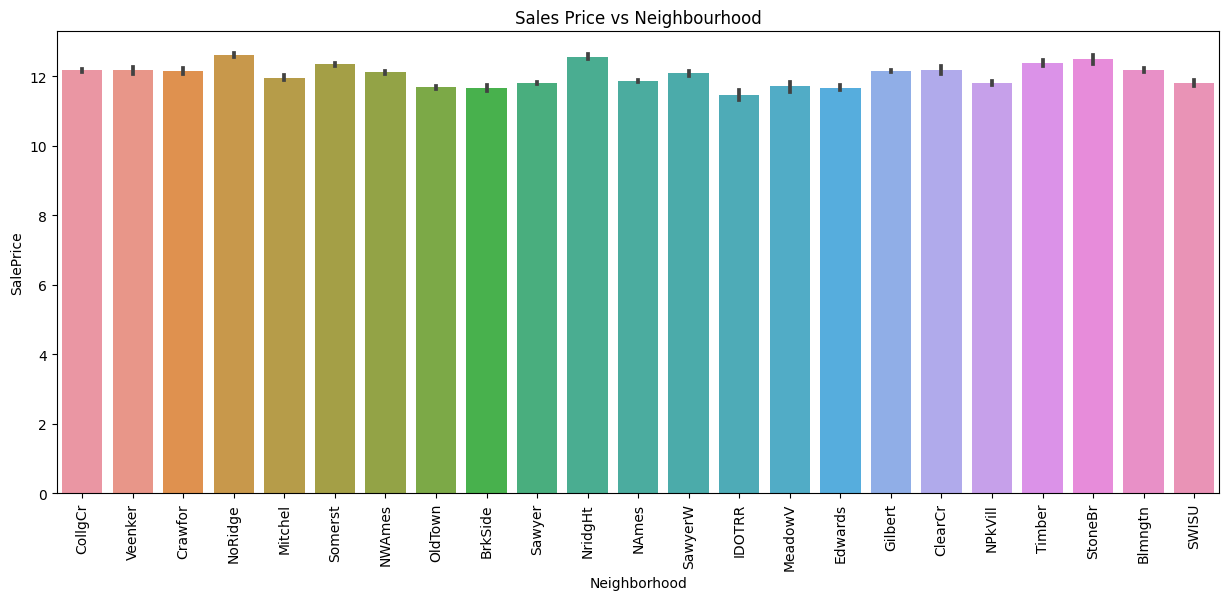

In [39]:
plt.figure(figsize=(15, 6))
sns.barplot(x="Neighborhood", y="SalePrice", data= df)
plt.title("Sales Price vs Neighbourhood")
plt.xticks(rotation=90)
plt.show()

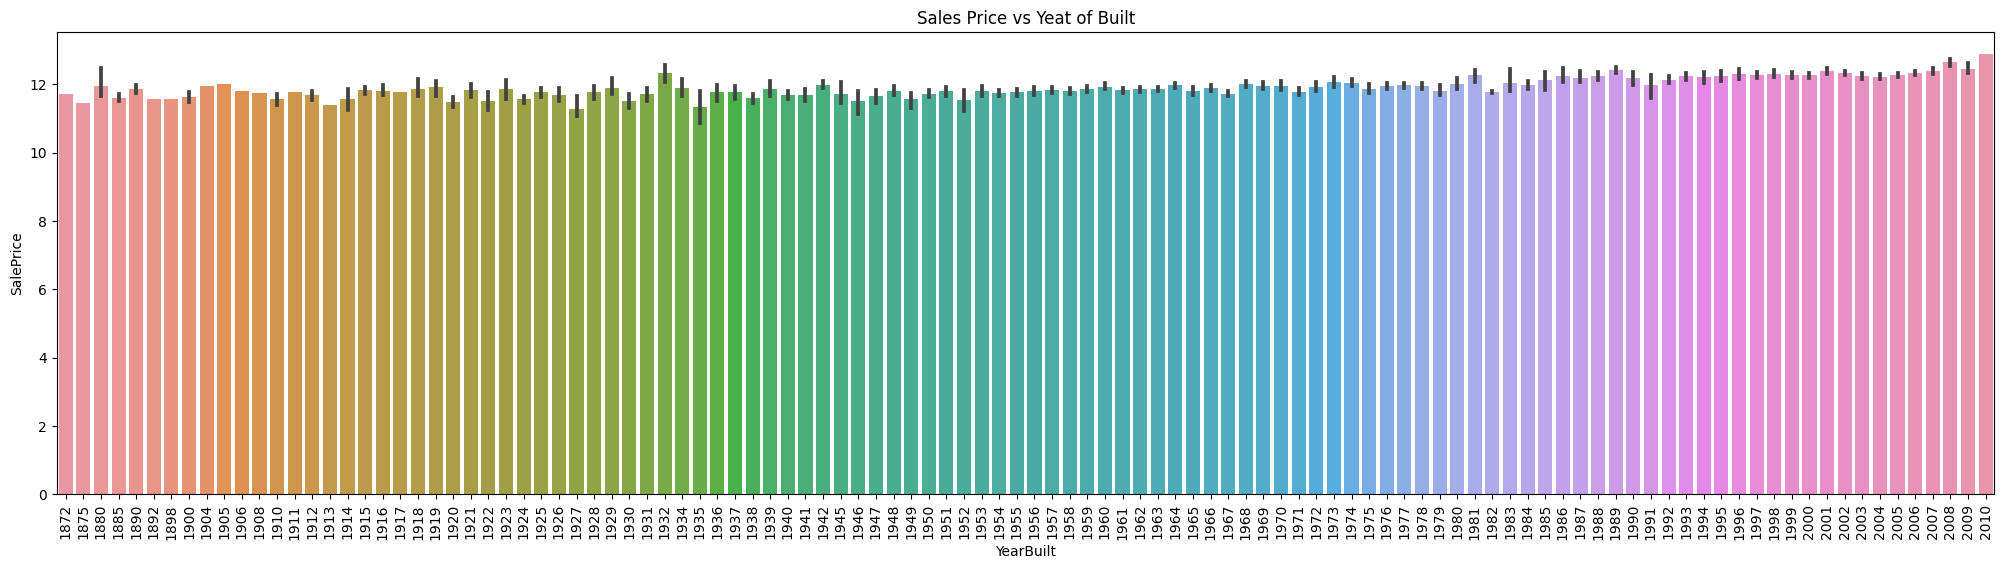

In [40]:
plt.figure(figsize=(25, 6))
sns.barplot(x="YearBuilt", y="SalePrice", data= df)
plt.title("Sales Price vs Yeat of Built")
plt.xticks(rotation=90)
plt.show()

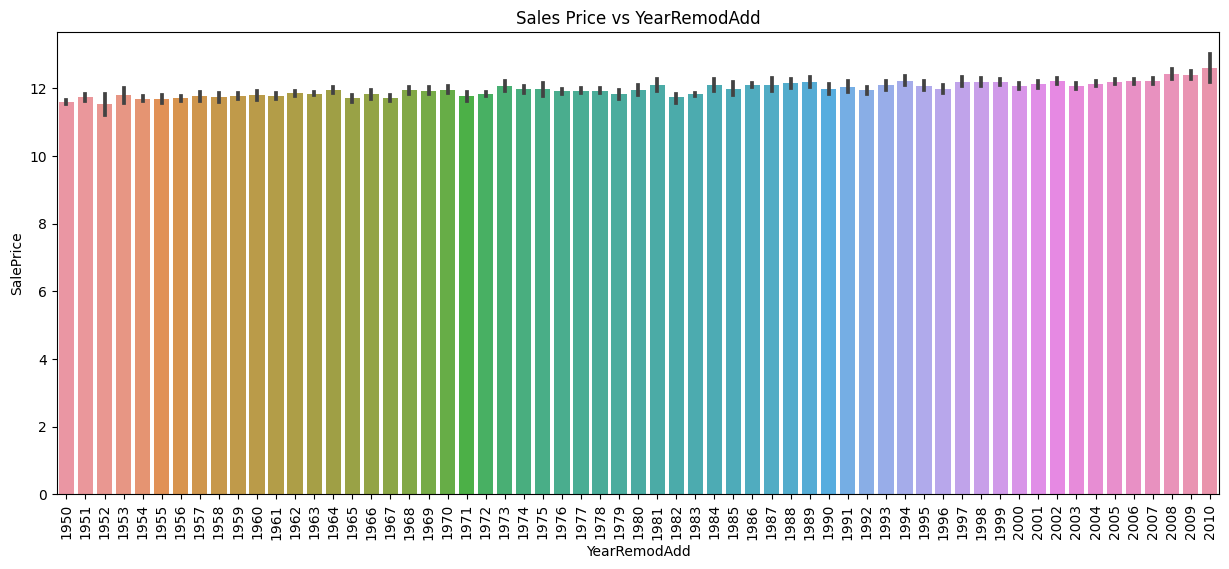

In [41]:
plt.figure(figsize=(15, 6))
sns.barplot(x="YearRemodAdd", y="SalePrice", data= df)
plt.title("Sales Price vs YearRemodAdd")
plt.xticks(rotation=90)
plt.show()

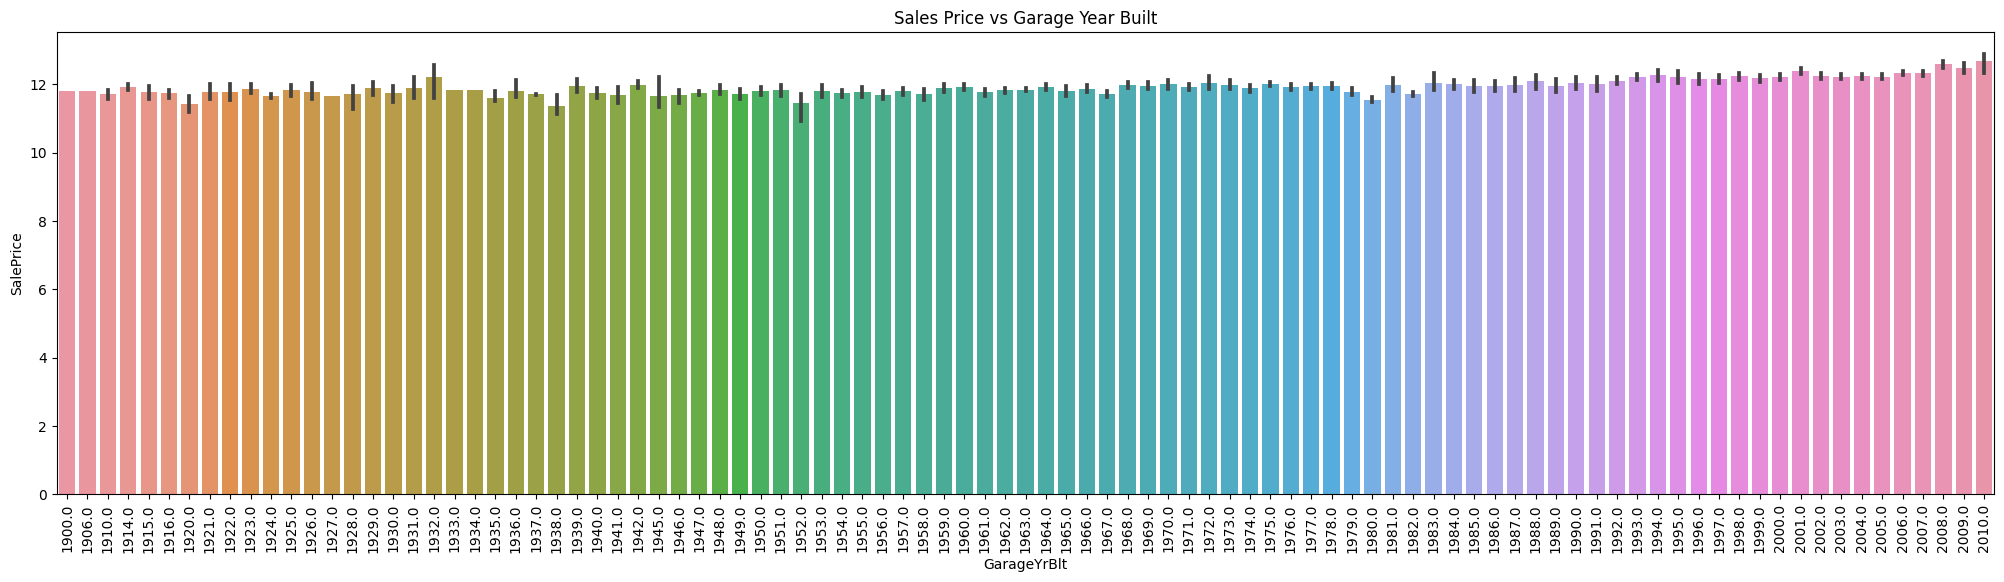

In [42]:
plt.figure(figsize=(25, 6))
sns.barplot(x="GarageYrBlt", y="SalePrice", data= df)
plt.title("Sales Price vs Garage Year Built")
plt.xticks(rotation=90)
plt.show()

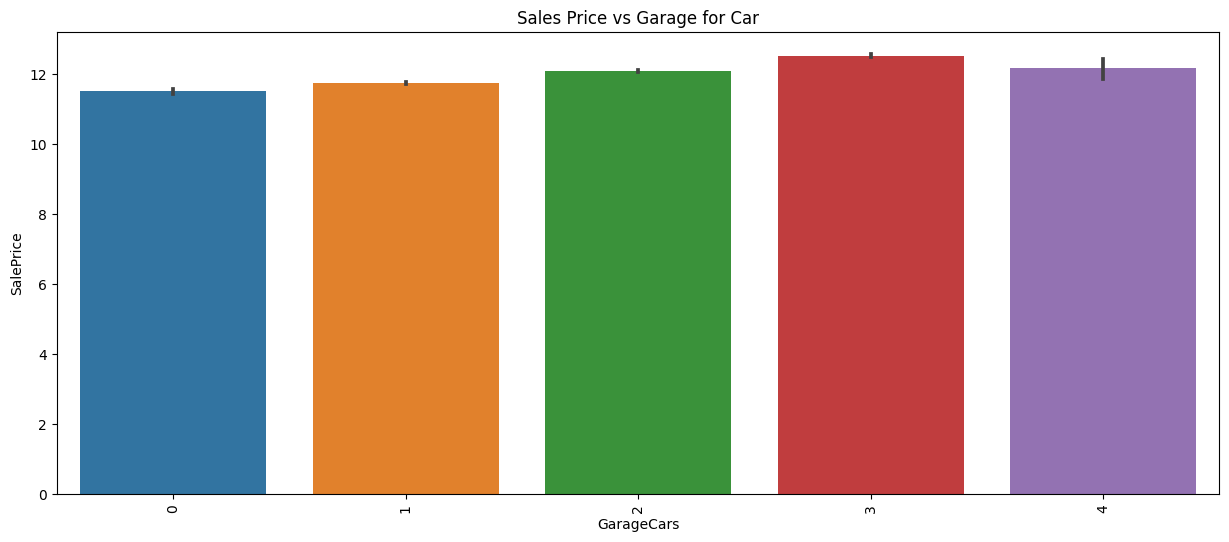

In [43]:
plt.figure(figsize=(15, 6))
sns.barplot(x="GarageCars", y="SalePrice", data= df)
plt.title("Sales Price vs Garage for Car")
plt.xticks(rotation=90)
plt.show()

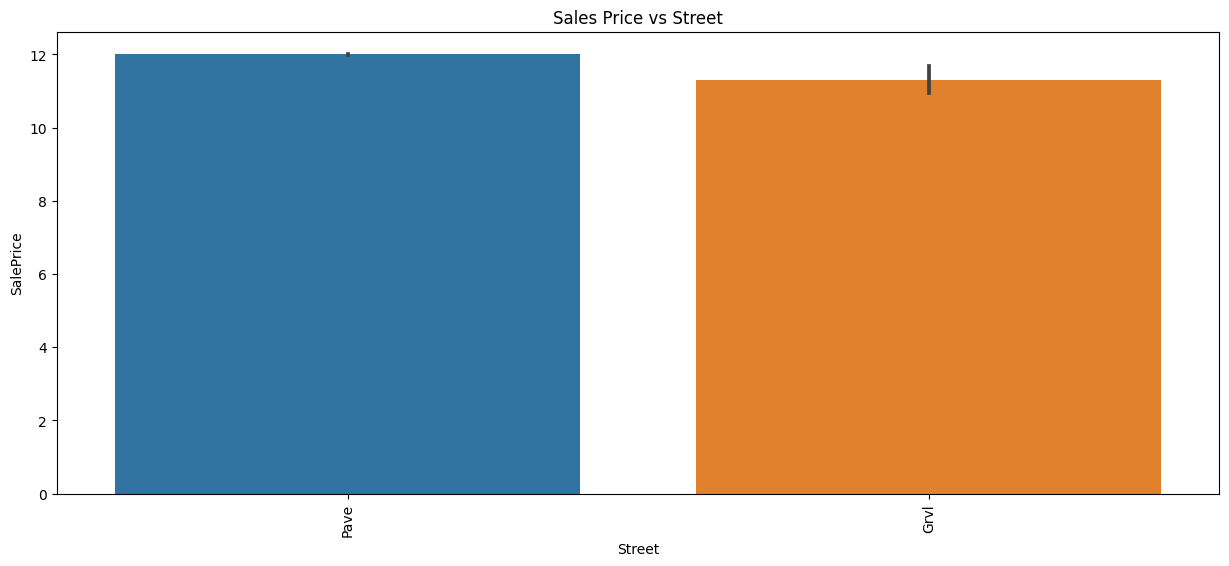

In [44]:
plt.figure(figsize=(15, 6))
sns.barplot(x="Street", y="SalePrice", data= df)
plt.title("Sales Price vs Street")
plt.xticks(rotation=90)
plt.show()

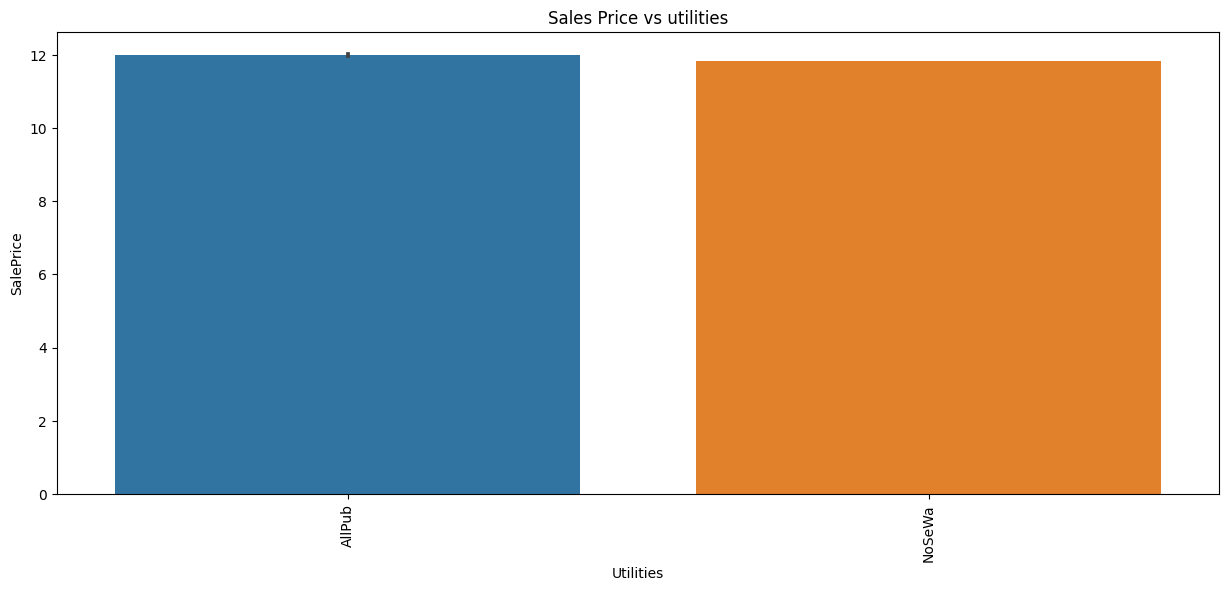

In [45]:
plt.figure(figsize=(15, 6))
sns.barplot(x="Utilities", y="SalePrice", data= df)
plt.title("Sales Price vs utilities")
plt.xticks(rotation=90)
plt.show()

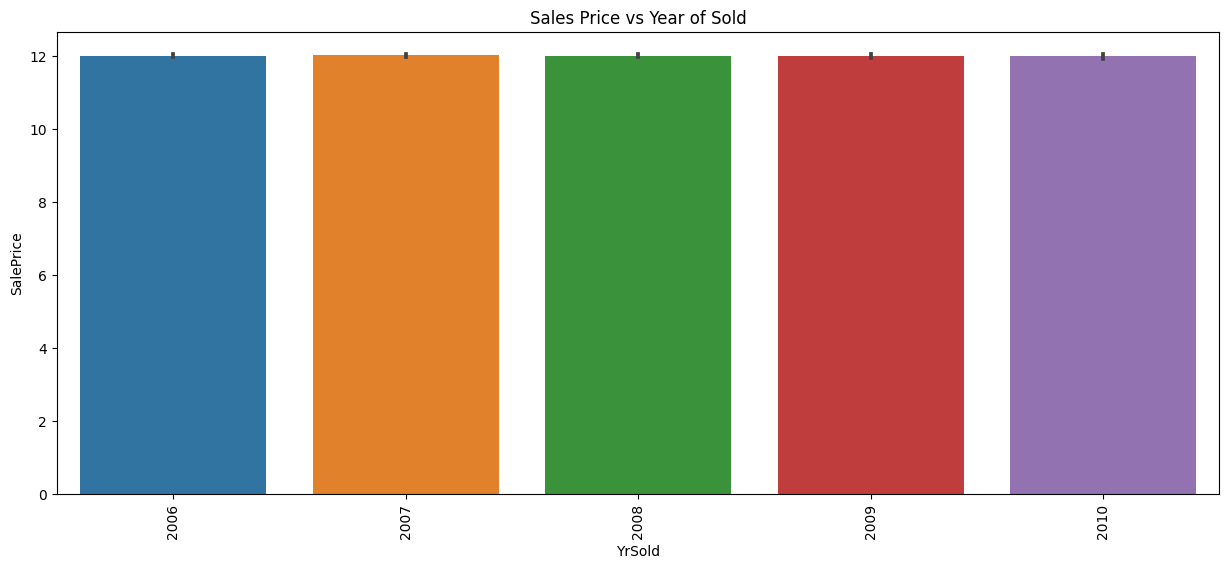

In [46]:
plt.figure(figsize=(15, 6))
sns.barplot(x="YrSold", y="SalePrice", data= df)
plt.title("Sales Price vs Year of Sold")
plt.xticks(rotation=90)
plt.show()

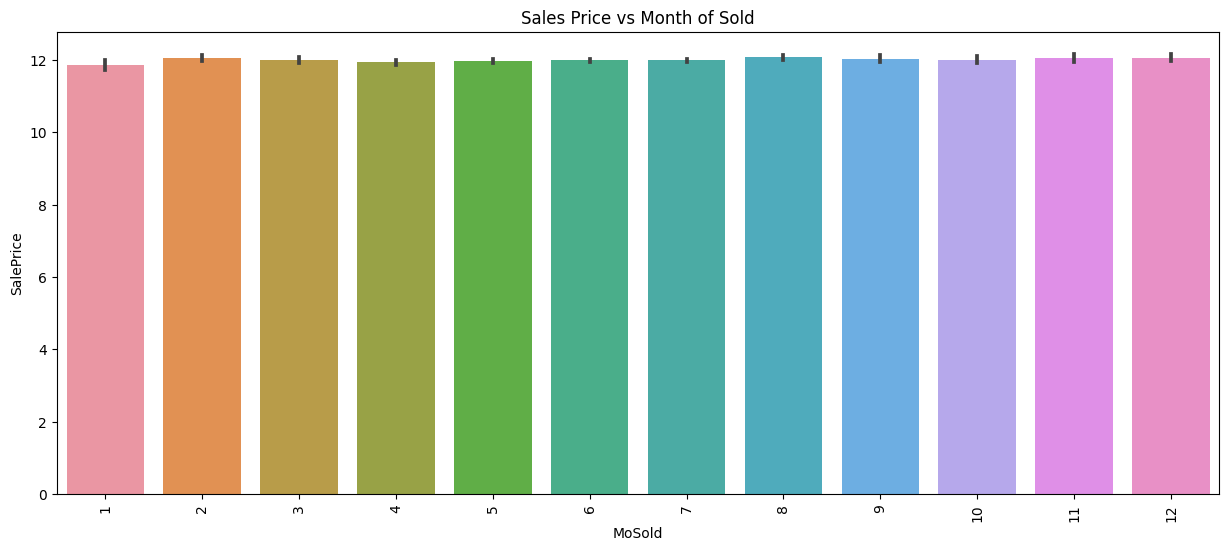

In [47]:
plt.figure(figsize=(15, 6))
sns.barplot(x="MoSold", y="SalePrice", data= df)
plt.title("Sales Price vs Month of Sold")
plt.xticks(rotation=90)
plt.show()

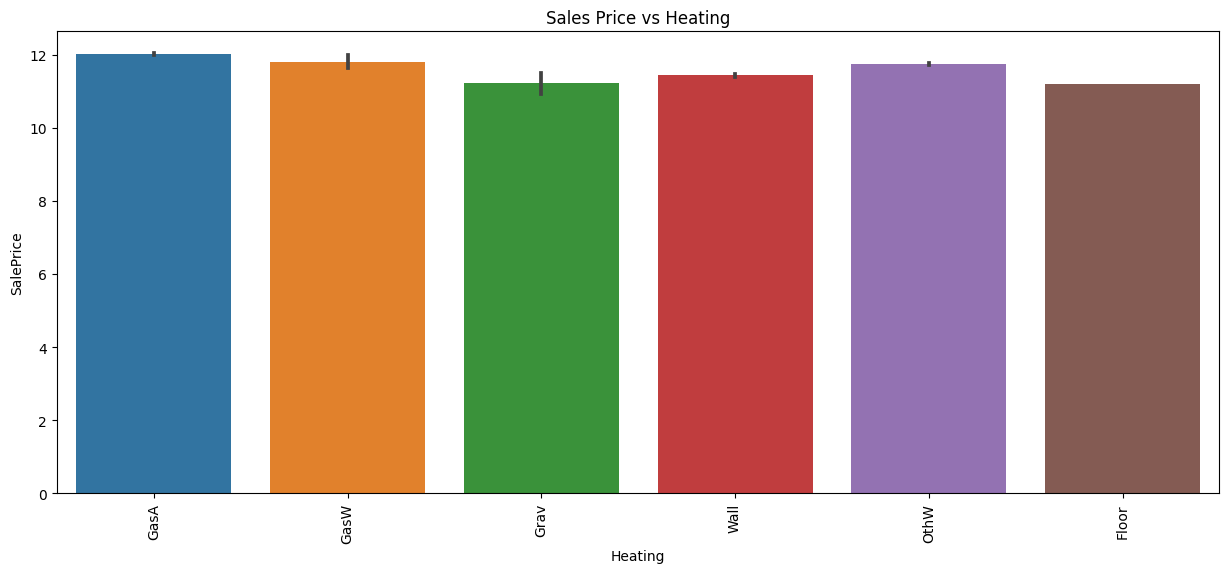

In [48]:
plt.figure(figsize=(15, 6))
sns.barplot(x="Heating", y="SalePrice", data= df)
plt.title("Sales Price vs Heating")
plt.xticks(rotation=90)
plt.show()

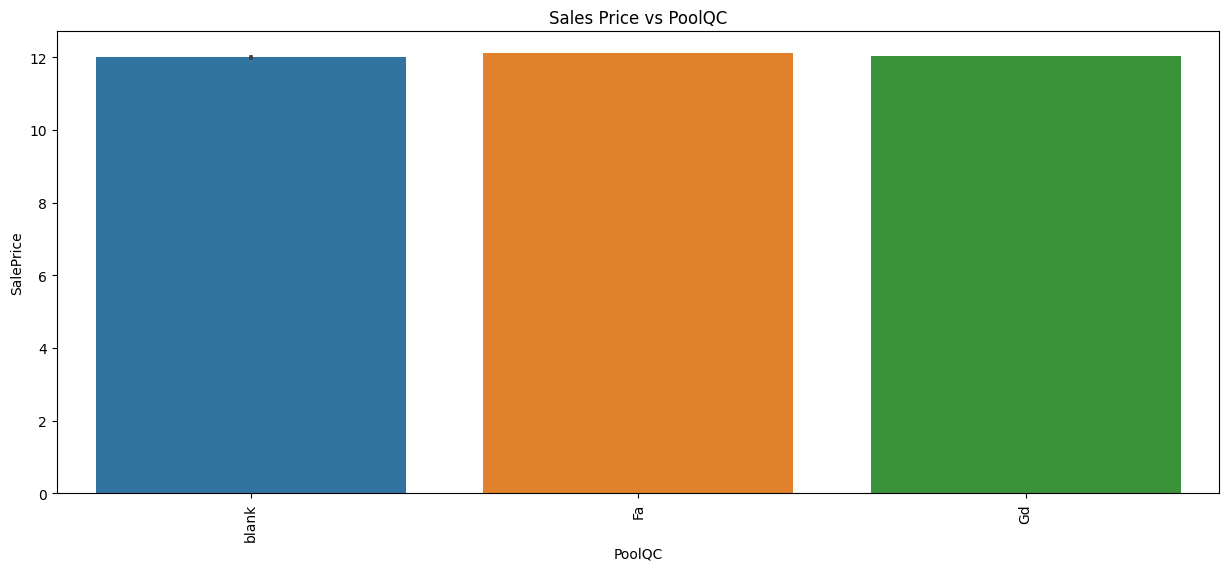

In [49]:
plt.figure(figsize=(15, 6))
sns.barplot(x="PoolQC", y="SalePrice", data= df)
plt.title("Sales Price vs PoolQC")
plt.xticks(rotation=90)
plt.show()

#### From the above few graphs, it is clear that these features does not contribute more in price pridiction. So can be dropped.

In [50]:
# Dropping unrelated columns
df = df.drop(['Street', 'Utilities','MoSold','YrSold','YearBuilt','YearRemodAdd','PoolQC','MiscVal', 'Alley', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional','GarageCars','BsmtUnfSF','TotRmsAbvGrd','GarageYrBlt'], axis=1)

In [51]:
df.shape

(1247, 60)

### Converting label to actual nomenclature from data dictionary

In [52]:
df['MSSubClass'].replace({20:"one_story_1946_newer",30:"one_story_1945_older",40:"single_story_finished",45:"oneHalf_story_unfinished",50:"oneHalf_story_finished",60:"two_story_1946_newer",70:"two_story_1945_older",75:"twoHalf_story_all_ages",80:"split_multilevel",85:"split_foyer",90:"duplex",120:"one_story_pud",150:"oneHalf_story_pud",160:"two_story_pud",180:"pud_multilevel",190:"two_family_conversion"},inplace=True)

In [53]:
df.MSSubClass.value_counts()

one_story_1946_newer        472
two_story_1946_newer        252
oneHalf_story_finished      130
one_story_pud                82
one_story_1945_older         65
two_story_1945_older         54
split_multilevel             52
duplex                       49
two_family_conversion        24
split_foyer                  20
two_story_pud                18
oneHalf_story_unfinished     12
twoHalf_story_all_ages       11
single_story_finished         3
pud_multilevel                3
Name: MSSubClass, dtype: int64

In [54]:
df['MSZoning'].replace({"A":"Agriculture","C":"Commercial","FV":"Floating_Village_Residential","I":"Industrial","RH":"Residential_High_Density","RL":"Residential_Low_Density","RP":"Residential_Low_Density_Park","RM":"Residential_Medium_Density"},inplace=True)

In [55]:
df.MSZoning.value_counts()

Residential_Low_Density         999
Residential_Medium_Density      173
Floating_Village_Residential     52
Residential_High_Density         15
C (all)                           8
Name: MSZoning, dtype: int64

In [56]:
df['MSZoning'].replace({"C (all)":"Commercial",},inplace=True)

In [57]:
df.MSZoning.value_counts()

Residential_Low_Density         999
Residential_Medium_Density      173
Floating_Village_Residential     52
Residential_High_Density         15
Commercial                        8
Name: MSZoning, dtype: int64

In [58]:
df['LotShape'].replace({"Reg":"Regular","IR1":"Slightly_irregular","IR2":"Moderately_Irregular","IR3":"Irregular"},inplace=True)

In [59]:
df.LotShape.value_counts()

Regular                 806
Slightly_irregular      417
Moderately_Irregular     21
Irregular                 3
Name: LotShape, dtype: int64

In [60]:
df['OverallQual'].replace({1:"Very_Poor",2:"Poor",3:"Fair",4:"Below_Average",5:"Average",6:"Above_Average",7:"Good",8:"Very Good",9:"Excellent"},inplace=True)

In [61]:
df.OverallQual.value_counts()

Average          362
Above_Average    314
Good             276
Very Good        139
Below_Average     98
Excellent         29
Fair              17
10                 7
Poor               3
Very_Poor          2
Name: OverallQual, dtype: int64

In [62]:
df['OverallQual'].replace({10:"Very_Excellent"},inplace=True)

In [63]:
df.OverallQual.value_counts()

Average           362
Above_Average     314
Good              276
Very Good         139
Below_Average      98
Excellent          29
Fair               17
Very_Excellent      7
Poor                3
Very_Poor           2
Name: OverallQual, dtype: int64

In [64]:
df['OverallCond'].replace({1:"Very_Poor",2:"Poor",3:"Fair",4:"Below_Average",5:"Average",6:"Above_Average",7:"Good",8:"Very Good",9:"Excellent",10:"Very_Excellent"},inplace=True)

In [65]:
df.OverallCond.value_counts()

Average          688
Above_Average    226
Good             180
Very Good         67
Below_Average     44
Fair              21
Excellent         16
Poor               4
Very_Poor          1
Name: OverallCond, dtype: int64

In [66]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,SaleType,SaleCondition,SalePrice
0,two_story_1946_newer,Residential_Low_Density,65.0,8450,Regular,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Good,Average,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,0,blank,Attchd,RFn,548,TA,Y,0,61,0,0,0,0,blank,WD,Normal,12.247699
1,one_story_1946_newer,Residential_Low_Density,80.0,9600,Regular,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,Above_Average,Very Good,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,1,TA,Attchd,RFn,460,TA,Y,298,0,0,0,0,0,blank,WD,Normal,12.109016
2,two_story_1946_newer,Residential_Low_Density,68.0,11250,Slightly_irregular,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Good,Average,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,1,TA,Attchd,RFn,608,TA,Y,0,42,0,0,0,0,blank,WD,Normal,12.317171
3,two_story_1945_older,Residential_Low_Density,60.0,9550,Slightly_irregular,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Good,Average,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,1,Gd,Detchd,Unf,642,TA,Y,0,35,272,0,0,0,blank,WD,Abnorml,11.849405
4,two_story_1946_newer,Residential_Low_Density,84.0,14260,Slightly_irregular,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Very Good,Average,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,1,TA,Attchd,RFn,836,TA,Y,192,84,0,0,0,0,blank,WD,Normal,12.429220


#### Saparating categorical columns for creating dummy variables

In [67]:
numeric = df.select_dtypes(include=['float64', 'int64'])

categorical = df.select_dtypes(include=['object'])

In [68]:
numeric.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice
0,65.0,8450,196.0,706,0,856,856,854,0,1710,1,0,2,1,3,1,0,548,0,61,0,0,0,0,12.247699
1,80.0,9600,0.0,978,0,1262,1262,0,0,1262,0,1,2,0,3,1,1,460,298,0,0,0,0,0,12.109016
2,68.0,11250,162.0,486,0,920,920,866,0,1786,1,0,2,1,3,1,1,608,0,42,0,0,0,0,12.317171
3,60.0,9550,0.0,216,0,756,961,756,0,1717,1,0,1,0,3,1,1,642,0,35,272,0,0,0,11.849405
4,84.0,14260,350.0,655,0,1145,1145,1053,0,2198,1,0,2,1,4,1,1,836,192,84,0,0,0,0,12.429220


In [69]:
numeric_columns = numeric.columns

In [70]:
print(list(numeric_columns))

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice']


In [71]:
categorical_columns = categorical.columns

In [72]:
print(list(categorical_columns))

['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']


In [73]:
categorical.head()

,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,FireplaceQu,GarageType,GarageFinish,GarageQual,PavedDrive,MiscFeature,SaleType,SaleCondition
0,two_story_1946_newer,Residential_Low_Density,Regular,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Good,Average,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,blank,Attchd,RFn,TA,Y,blank,WD,Normal
1,one_story_1946_newer,Residential_Low_Density,Regular,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,Above_Average,Very Good,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,TA,Attchd,RFn,TA,Y,blank,WD,Normal
2,two_story_1946_newer,Residential_Low_Density,Slightly_irregular,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Good,Average,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,TA,Attchd,RFn,TA,Y,blank,WD,Normal
3,two_story_1945_older,Residential_Low_Density,Slightly_irregular,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Good,Average,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Gd,Detchd,Unf,TA,Y,blank,WD,Abnorml
4,two_story_1946_newer,Residential_Low_Density,Slightly_irregular,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Very Good,Average,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,TA,Attchd,RFn,TA,Y,blank,WD,Normal


#### Creating dummy variables

In [74]:
df = pd.get_dummies(df, drop_first=True )
df.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice,MSSubClass_oneHalf_story_finished,MSSubClass_oneHalf_story_unfinished,MSSubClass_one_story_1945_older,MSSubClass_one_story_1946_newer,MSSubClass_one_story_pud,MSSubClass_pud_multilevel,MSSubClass_single_story_finished,MSSubClass_split_foyer,MSSubClass_split_multilevel,MSSubClass_twoHalf_story_all_ages,MSSubClass_two_family_conversion,MSSubClass_two_story_1945_older,MSSubClass_two_story_1946_newer,MSSubClass_two_story_pud,MSZoning_Floating_Village_Residential,MSZoning_Residential_High_Density,MSZoning_Residential_Low_Density,MSZoning_Residential_Medium_Density,LotShape_Moderately_Irregular,LotShape_Regular,LotShape_Slightly_irregular,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,...,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_blank,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_blank,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_blank,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_blank,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_blank,PavedDrive_P,PavedDrive_Y,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_blank,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,196.0,706,0,856,856,854,0,1710,1,0,2,1,3,1,0,548,0,61,0,0,0,0,12.247699,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,0.0,978,0,1262,1262,0,0,1262,0,1,2,0,3,1,1,460,298,0,0,0,0,0,12.109016,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,162.0,486,0,920,920,866,0,1786,1,0,2,1,3,1,1,608,0,42,0,0,0,0,12.317171,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,0.0,216,0,756,961,756,0,1717,1,0,1,0,3,1,1,642,0,35,272,0,0,0,11.849405,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,350.0,655,0,1145,1145,1053,0,2198,1,0,2,1,4,1,1,836,192,84,0,0,0,0,12.429220,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


#### saparating target variable and independent variables

In [75]:
X = df.drop(['SalePrice'], axis=1)
X.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MSSubClass_oneHalf_story_finished,MSSubClass_oneHalf_story_unfinished,MSSubClass_one_story_1945_older,MSSubClass_one_story_1946_newer,MSSubClass_one_story_pud,MSSubClass_pud_multilevel,MSSubClass_single_story_finished,MSSubClass_split_foyer,MSSubClass_split_multilevel,MSSubClass_twoHalf_story_all_ages,MSSubClass_two_family_conversion,MSSubClass_two_story_1945_older,MSSubClass_two_story_1946_newer,MSSubClass_two_story_pud,MSZoning_Floating_Village_Residential,MSZoning_Residential_High_Density,MSZoning_Residential_Low_Density,MSZoning_Residential_Medium_Density,LotShape_Moderately_Irregular,LotShape_Regular,LotShape_Slightly_irregular,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,...,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_blank,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_blank,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_blank,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_blank,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_blank,PavedDrive_P,PavedDrive_Y,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_blank,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,196.0,706,0,856,856,854,0,1710,1,0,2,1,3,1,0,548,0,61,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,0.0,978,0,1262,1262,0,0,1262,0,1,2,0,3,1,1,460,298,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,162.0,486,0,920,920,866,0,1786,1,0,2,1,3,1,1,608,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,0.0,216,0,756,961,756,0,1717,1,0,1,0,3,1,1,642,0,35,272,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,350.0,655,0,1145,1145,1053,0,2198,1,0,2,1,4,1,1,836,192,84,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [76]:
y = data['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [77]:
# Splitting the dataset into train dataset and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [78]:
print(X_train.shape)
print(X_test.shape)

(872, 230)
(375, 230)


In [79]:
# Dropping Saleprice from list of columns
numeric_columns_withour_saleprice = list(numeric_columns)[0:-1]

In [80]:
numeric_columns_withour_saleprice

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea']

In [81]:
scaler = StandardScaler()

X_train[numeric_columns_withour_saleprice] = scaler.fit_transform(X_train[numeric_columns_withour_saleprice])

X_test[numeric_columns_withour_saleprice] = scaler.fit_transform(X_test[numeric_columns_withour_saleprice])

In [82]:
X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MSSubClass_oneHalf_story_finished,MSSubClass_oneHalf_story_unfinished,MSSubClass_one_story_1945_older,MSSubClass_one_story_1946_newer,MSSubClass_one_story_pud,MSSubClass_pud_multilevel,MSSubClass_single_story_finished,MSSubClass_split_foyer,MSSubClass_split_multilevel,MSSubClass_twoHalf_story_all_ages,MSSubClass_two_family_conversion,MSSubClass_two_story_1945_older,MSSubClass_two_story_1946_newer,MSSubClass_two_story_pud,MSZoning_Floating_Village_Residential,MSZoning_Residential_High_Density,MSZoning_Residential_Low_Density,MSZoning_Residential_Medium_Density,LotShape_Moderately_Irregular,LotShape_Regular,LotShape_Slightly_irregular,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,...,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_blank,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_blank,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_blank,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_blank,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_blank,PavedDrive_P,PavedDrive_Y,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_blank,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1368,0.005333,-1.798146,0.421208,0.629681,-0.289534,-0.444073,-0.864259,-0.797629,-0.118762,-1.415644,1.139495,-0.252006,-1.004708,-0.723790,-2.348328,-0.24156,-0.932318,-0.207916,0.399292,-0.709557,-0.385638,-0.12302,-0.265647,-0.047863,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
471,1.703222,0.929050,-0.569681,-1.028679,-0.289534,-0.544646,0.080004,1.128096,-0.118762,1.117297,-0.808818,-0.252006,0.867312,1.279844,0.165781,-0.24156,0.690399,0.338075,-0.778592,-0.709557,-0.385638,-0.12302,5.224586,-0.047863,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1075,0.448261,1.354619,-0.569681,-0.036084,-0.289534,-0.564760,-0.526375,1.061363,-0.118762,0.599863,-0.808818,-0.252006,-1.004708,1.279844,0.165781,-0.24156,2.313116,-1.070007,-0.778592,-0.709557,-0.385638,-0.12302,-0.265647,-0.047863,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
331,0.079155,-0.440897,-0.569681,1.019456,-0.289534,0.078904,-0.236761,-0.797629,-0.118762,-0.945660,1.139495,-0.252006,-1.004708,-0.723790,0.165781,-0.24156,-0.932318,-0.744328,-0.778592,-0.709557,-0.385638,-0.12302,-0.265647,-0.047863,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1059,0.005333,0.683432,2.228123,-0.309653,3.330138,-0.428987,-0.116089,1.335445,-0.118762,1.167007,-0.808818,-0.252006,-1.004708,1.279844,0.165781,-0.24156,0.690399,-0.150443,-0.778592,-0.709557,-0.084712,-0.12302,-0.265647,-0.047863,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [83]:
X_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MSSubClass_oneHalf_story_finished,MSSubClass_oneHalf_story_unfinished,MSSubClass_one_story_1945_older,MSSubClass_one_story_1946_newer,MSSubClass_one_story_pud,MSSubClass_pud_multilevel,MSSubClass_single_story_finished,MSSubClass_split_foyer,MSSubClass_split_multilevel,MSSubClass_twoHalf_story_all_ages,MSSubClass_two_family_conversion,MSSubClass_two_story_1945_older,MSSubClass_two_story_1946_newer,MSSubClass_two_story_pud,MSZoning_Floating_Village_Residential,MSZoning_Residential_High_Density,MSZoning_Residential_Low_Density,MSZoning_Residential_Medium_Density,LotShape_Moderately_Irregular,LotShape_Regular,LotShape_Slightly_irregular,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,...,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_blank,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_blank,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_blank,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_blank,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_blank,PavedDrive_P,PavedDrive_Y,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_blank,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1426,1.022705,0.734392,2.493866,1.351442,-0.264511,0.463791,0.228182,1.549048,-0.073187,1.580248,1.184957,-0.225733,0.946448,1.326749,0.225355,-0.159538,2.301360,0.322199,0.764734,1.380257,-0.355110,-0.095043,-0.290532,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
896,-1.224308,-0.091661,-0.552343,-0.341681,-0.264511,-0.263433,-0.579065,-0.698053,-0.073187,-1.081881,-0.825716,-0.225733,-0.992994,-0.703989,-1.095084,-0.159538,-0.900904,-0.687179,-0.724668,-0.290082,-0.355110,-0.095043,-0.290532,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1435,0.950221,-0.230031,1.059156,-1.016562,-0.264511,0.720458,1.160078,-0.698053,-0.073187,0.244656,1.184957,-0.225733,-0.992994,1.326749,0.225355,-0.159538,0.700228,0.001033,-0.724668,-0.161595,-0.355110,-0.095043,-0.290532,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1256,1.747549,2.007778,3.214621,2.094996,-0.264511,2.503761,2.495597,-0.698053,-0.073187,1.263328,1.184957,-0.225733,0.946448,-0.703989,-1.095084,-0.159538,0.700228,1.168444,1.557339,-0.161595,-0.355110,-0.095043,-0.290532,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
645,0.152894,0.577445,-0.552343,-0.348785,-0.010731,-0.183225,-0.490031,-0.698053,-0.073187,-1.013969,1.184957,-0.225733,-0.992994,1.326749,0.225355,-0.159538,-0.900904,0.582190,-0.724668,4.271230,0.391442,-0.095043,-0.290532,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


### Building model with regular MLR using RFE

In [84]:
lm = LinearRegression()
lm.fit(X_train, y_train)
 
rfe = RFE(lm, n_features_to_select=50)            
rfe = rfe.fit(X_train, y_train)

In [85]:
# Check the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 169),
 ('LotArea', False, 99),
 ('MasVnrArea', False, 164),
 ('BsmtFinSF1', False, 68),
 ('BsmtFinSF2', False, 143),
 ('TotalBsmtSF', False, 29),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 10),
 ('GrLivArea', False, 9),
 ('BsmtFullBath', False, 129),
 ('BsmtHalfBath', False, 172),
 ('FullBath', False, 130),
 ('HalfBath', False, 122),
 ('BedroomAbvGr', False, 165),
 ('KitchenAbvGr', False, 118),
 ('Fireplaces', False, 135),
 ('GarageArea', False, 86),
 ('WoodDeckSF', False, 147),
 ('OpenPorchSF', False, 157),
 ('EnclosedPorch', False, 156),
 ('3SsnPorch', False, 167),
 ('ScreenPorch', False, 150),
 ('PoolArea', False, 163),
 ('MSSubClass_oneHalf_story_finished', False, 17),
 ('MSSubClass_oneHalf_story_unfinished', False, 27),
 ('MSSubClass_one_story_1945_older', False, 14),
 ('MSSubClass_one_story_1946_newer', True, 1),
 ('MSSubClass_one_story_pud', True, 1),
 ('MSSubClass_pud_multilevel', False, 12),
 ('MSSubClass_single_story_finis

In [86]:
col = X_train.columns[rfe.support_]
col

Index(['1stFlrSF', '2ndFlrSF', 'MSSubClass_one_story_1946_newer',
       'MSSubClass_one_story_pud', 'MSSubClass_single_story_finished',
       'MSSubClass_twoHalf_story_all_ages', 'MSSubClass_two_story_1946_newer',
       'MSZoning_Floating_Village_Residential',
       'MSZoning_Residential_High_Density', 'MSZoning_Residential_Low_Density',
       'MSZoning_Residential_Medium_Density', 'LandSlope_Sev',
       'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge',
       'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl', 'OverallQual_Below_Average', 'OverallQual_Excellent',
       'OverallQual_Fair', 'OverallQual_Good', 'OverallQual_Very Good',
       'OverallQual_Very_Excellent', 'OverallQual_Very_Poor',
       'OverallCond_Fair', 'Exterior1st_BrkComm', 'Exterior2nd_Brk Cmn',
       'Exterior2nd_Other', 'ExterQual_Fa', 'ExterCond_Fa', 'ExterCond_Gd',
       'ExterCond_Po', 'ExterCond_TA', 'Foundation_Stone', 'BsmtCond_blank',
    

In [87]:
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath',
       ...
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=180)

In [88]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [89]:
X_train_rfe = pd.DataFrame(X_train[col])

In [90]:
X_train_rfe.head()

,1stFlrSF,2ndFlrSF,MSSubClass_one_story_1946_newer,MSSubClass_one_story_pud,MSSubClass_single_story_finished,MSSubClass_twoHalf_story_all_ages,MSSubClass_two_story_1946_newer,MSZoning_Floating_Village_Residential,MSZoning_Residential_High_Density,MSZoning_Residential_Low_Density,MSZoning_Residential_Medium_Density,LandSlope_Sev,Neighborhood_Crawfor,Neighborhood_MeadowV,Neighborhood_NoRidge,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Below_Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Very Good,OverallQual_Very_Excellent,OverallQual_Very_Poor,OverallCond_Fair,Exterior1st_BrkComm,Exterior2nd_Brk Cmn,Exterior2nd_Other,ExterQual_Fa,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_Stone,BsmtCond_blank,BsmtExposure_Gd,BsmtFinType1_blank,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageQual_Fa,GarageQual_Po,SaleType_Oth
1368,-0.864259,-0.797629,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0
471,0.080004,1.128096,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0
1075,-0.526375,1.061363,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0
331,-0.236761,-0.797629,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0
1059,-0.116089,1.335445,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0


In [91]:
# prediction
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9480708976211283

In [92]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-7.298979064396187e+19

#### From the above model, we got very poor R square value.

In [93]:
# Check the ranks
list(zip(X_test.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 169),
 ('LotArea', False, 99),
 ('MasVnrArea', False, 164),
 ('BsmtFinSF1', False, 68),
 ('BsmtFinSF2', False, 143),
 ('TotalBsmtSF', False, 29),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 10),
 ('GrLivArea', False, 9),
 ('BsmtFullBath', False, 129),
 ('BsmtHalfBath', False, 172),
 ('FullBath', False, 130),
 ('HalfBath', False, 122),
 ('BedroomAbvGr', False, 165),
 ('KitchenAbvGr', False, 118),
 ('Fireplaces', False, 135),
 ('GarageArea', False, 86),
 ('WoodDeckSF', False, 147),
 ('OpenPorchSF', False, 157),
 ('EnclosedPorch', False, 156),
 ('3SsnPorch', False, 167),
 ('ScreenPorch', False, 150),
 ('PoolArea', False, 163),
 ('MSSubClass_oneHalf_story_finished', False, 17),
 ('MSSubClass_oneHalf_story_unfinished', False, 27),
 ('MSSubClass_one_story_1945_older', False, 14),
 ('MSSubClass_one_story_1946_newer', True, 1),
 ('MSSubClass_one_story_pud', True, 1),
 ('MSSubClass_pud_multilevel', False, 12),
 ('MSSubClass_single_story_finis

In [94]:
col1 = X_test.columns[rfe.support_]
col1

Index(['1stFlrSF', '2ndFlrSF', 'MSSubClass_one_story_1946_newer',
       'MSSubClass_one_story_pud', 'MSSubClass_single_story_finished',
       'MSSubClass_twoHalf_story_all_ages', 'MSSubClass_two_story_1946_newer',
       'MSZoning_Floating_Village_Residential',
       'MSZoning_Residential_High_Density', 'MSZoning_Residential_Low_Density',
       'MSZoning_Residential_Medium_Density', 'LandSlope_Sev',
       'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge',
       'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl', 'OverallQual_Below_Average', 'OverallQual_Excellent',
       'OverallQual_Fair', 'OverallQual_Good', 'OverallQual_Very Good',
       'OverallQual_Very_Excellent', 'OverallQual_Very_Poor',
       'OverallCond_Fair', 'Exterior1st_BrkComm', 'Exterior2nd_Brk Cmn',
       'Exterior2nd_Other', 'ExterQual_Fa', 'ExterCond_Fa', 'ExterCond_Gd',
       'ExterCond_Po', 'ExterCond_TA', 'Foundation_Stone', 'BsmtCond_blank',
    

In [95]:
X_test_rfe = X_test[col1]

In [96]:
X_test_rfe.head()

,1stFlrSF,2ndFlrSF,MSSubClass_one_story_1946_newer,MSSubClass_one_story_pud,MSSubClass_single_story_finished,MSSubClass_twoHalf_story_all_ages,MSSubClass_two_story_1946_newer,MSZoning_Floating_Village_Residential,MSZoning_Residential_High_Density,MSZoning_Residential_Low_Density,MSZoning_Residential_Medium_Density,LandSlope_Sev,Neighborhood_Crawfor,Neighborhood_MeadowV,Neighborhood_NoRidge,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Below_Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Very Good,OverallQual_Very_Excellent,OverallQual_Very_Poor,OverallCond_Fair,Exterior1st_BrkComm,Exterior2nd_Brk Cmn,Exterior2nd_Other,ExterQual_Fa,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_Stone,BsmtCond_blank,BsmtExposure_Gd,BsmtFinType1_blank,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageQual_Fa,GarageQual_Po,SaleType_Oth
1426,0.228182,1.549048,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0
896,-0.579065,-0.698053,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1435,1.160078,-0.698053,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0
1256,2.495597,-0.698053,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0
645,-0.490031,-0.698053,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0


#### As we come to know that here MLR fails to achieve the goal. Hence going for lasso regression

In [97]:
# list of alphas to tuning the model

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 100, 500, 1000 ]}
lasso = Lasso()
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [98]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.254633,0.164540,0.000000,0.000000,0.0001,{'alpha': 0.0001},-0.074802,-0.090243,-0.084768,-0.085477,-0.077955,-0.082649,0.005546,1,-0.061936,-0.059368,-0.060994,-0.058512,-0.061632,-0.060488,0.001328
1,0.028136,0.006255,0.003126,0.006251,0.001,{'alpha': 0.001},-0.081786,-0.085098,-0.086865,-0.090935,-0.081586,-0.085254,0.003475,2,-0.075154,-0.073476,-0.076315,-0.073360,-0.075304,-0.074722,0.001138
2,0.009375,0.007655,0.003125,0.006249,0.01,{'alpha': 0.01},-0.103626,-0.107683,-0.109916,-0.113787,-0.102917,-0.107586,0.004034,3,-0.105966,-0.103747,-0.104164,-0.103970,-0.104754,-0.104520,0.000797
3,0.009375,0.007654,0.000000,0.000000,0.1,{'alpha': 0.1},-0.167496,-0.168226,-0.171202,-0.202541,-0.187150,-0.179323,0.013633,4,-0.179158,-0.176441,-0.178734,-0.177422,-0.181646,-0.178680,0.001768
4,0.009376,0.007655,0.006250,0.007654,0.2,{'alpha': 0.2},-0.236523,-0.238981,-0.244689,-0.277193,-0.268350,-0.253147,0.016480,5,-0.251505,-0.251404,-0.252610,-0.250577,-0.255060,-0.252231,0.001555


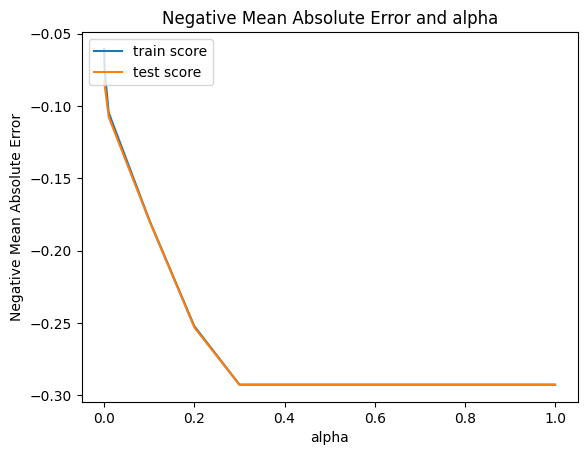

In [99]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [100]:
# At alpha = 0.02, even the smallest of negative coefficients that have some predictive power towards 'SalePrice' have been generated

alpha = 0.02
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([ 0.00613792,  0.00254967,  0.00351887,  0.04506874,  0.        ,
        0.07527437,  0.00446854,  0.        , -0.        ,  0.10809531,
        0.        ,  0.        ,  0.03944194,  0.02473394, -0.        ,
       -0.03182096,  0.03053684,  0.07368347,  0.00526022,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.  

#### Here Lasso brings the coefficients of insignificant features to zero.

In [101]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.006),
 ('LotFrontage', 0.006),
 ('LotArea', 0.003),
 ('MasVnrArea', 0.004),
 ('BsmtFinSF1', 0.045),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.075),
 ('1stFlrSF', 0.004),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.108),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.039),
 ('HalfBath', 0.025),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', -0.032),
 ('Fireplaces', 0.031),
 ('GarageArea', 0.074),
 ('WoodDeckSF', 0.005),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', -0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('MSSubClass_oneHalf_story_finished', -0.0),
 ('MSSubClass_oneHalf_story_unfinished', -0.0),
 ('MSSubClass_one_story_1945_older', -0.0),
 ('MSSubClass_one_story_1946_newer', 0.0),
 ('MSSubClass_one_story_pud', 0.0),
 ('MSSubClass_pud_multilevel', 0.0),
 ('MSSubClass_single_story_finished', -0.0),
 ('MSSubClass_split_foyer', 0.0),
 ('MSSubClass_split_multilevel', 0.0),
 ('MSSubClass_twoHalf_story_all_ages', -0.0),

In [102]:
# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8325240925538283
0.8221363978857783


In [103]:
# RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

0.1517479806341958

In [104]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))

In [105]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

,Variable,Coeff
0,constant,12.006
1,LotFrontage,0.006
2,LotArea,0.003
3,MasVnrArea,0.004
4,BsmtFinSF1,0.045


In [106]:
# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

,Variable,Coeff
0,constant,12.006
10,GrLivArea,0.108
6,TotalBsmtSF,0.075
18,GarageArea,0.074
158,Foundation_PConc,0.055
...,...,...
89,HouseStyle_1.5Unf,-0.000
230,SaleCondition_Partial,0.000
152,ExterQual_TA,-0.011
16,KitchenAbvGr,-0.032


In [107]:
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

,Variable,Coeff
0,constant,12.006
10,GrLivArea,0.108
6,TotalBsmtSF,0.075
18,GarageArea,0.074
158,Foundation_PConc,0.055
4,BsmtFinSF1,0.045
13,FullBath,0.039
17,Fireplaces,0.031
14,HalfBath,0.025
1,LotFrontage,0.006


In [108]:
# These 16 variables obtained from Lasso Regression can be concluded to have the strong effect on the SalePrice
pred.shape

(17, 2)

In [109]:
Lassso_var = list(pred['Variable'])
print(Lassso_var)

['constant', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'Foundation_PConc', 'BsmtFinSF1', 'FullBath', 'Fireplaces', 'HalfBath', 'LotFrontage', 'WoodDeckSF', '1stFlrSF', 'MasVnrArea', 'LotArea', 'ExterQual_TA', 'KitchenAbvGr', 'KitchenQual_TA']


### Ridge Regression

In [110]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [111]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.025042,0.019035,0.005511,0.005264,0.0001,{'alpha': 0.0001},-0.086306,-0.099862,-0.090734,-0.098350,-0.085094,-0.092069,0.006063,22,-0.058105,-0.055714,-0.058907,-0.054539,-0.059405,-0.057334,0.001887
1,0.015634,0.000043,0.003117,0.006233,0.001,{'alpha': 0.001},-0.086247,-0.099815,-0.090691,-0.098190,-0.085058,-0.092000,0.006040,21,-0.058113,-0.055727,-0.058914,-0.054562,-0.059413,-0.057346,0.001881
2,0.015616,0.000046,0.009373,0.007653,0.01,{'alpha': 0.01},-0.085709,-0.099369,-0.090297,-0.096896,-0.084707,-0.091396,0.005867,20,-0.058186,-0.055852,-0.058974,-0.054749,-0.059492,-0.057451,0.001837
3,0.015617,0.000038,0.003125,0.006250,0.1,{'alpha': 0.1},-0.082421,-0.096564,-0.088242,-0.092186,-0.082651,-0.088413,0.005474,19,-0.058762,-0.056764,-0.059441,-0.055778,-0.060002,-0.058150,0.001614
4,0.015615,0.000048,0.003125,0.006250,0.2,{'alpha': 0.2},-0.080338,-0.094787,-0.087177,-0.090188,-0.081453,-0.086789,0.005399,18,-0.059262,-0.057403,-0.059786,-0.056492,-0.060319,-0.058652,0.001460


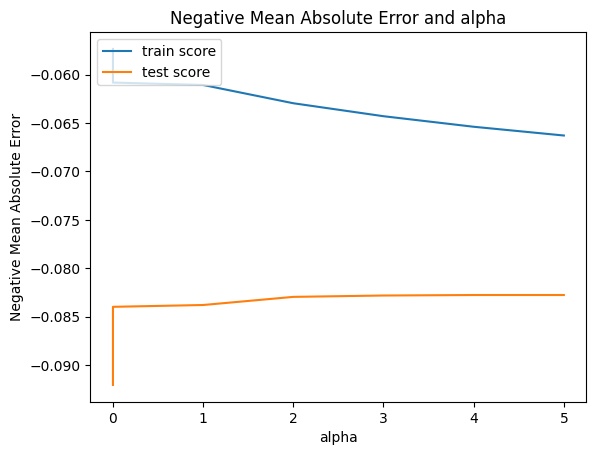

In [112]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [113]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.00508521,  0.01614279,  0.00745554,  0.02317309,  0.00988996,
        0.03356226,  0.04313252,  0.03292238, -0.00479048,  0.06302861,
        0.011907  ,  0.0026878 ,  0.02302352,  0.0213367 ,  0.0064866 ,
       -0.01784216,  0.01419916,  0.02541146,  0.00806641,  0.00280667,
        0.00634574,  0.00330857,  0.00858685,  0.00709922, -0.00307712,
       -0.01712421, -0.03409587,  0.04336641,  0.03731399,  0.02331923,
       -0.0390788 , -0.01067024,  0.00676966,  0.0044414 , -0.00741581,
        0.00241872,  0.03252846, -0.06293739,  0.19261121,  0.15789806,
        0.17350716,  0.16070235,  0.01722202, -0.00694199, -0.01028003,
       -0.01455428, -0.0657292 , -0.01208119,  0.02305471, -0.01963387,
       -0.02548654, -0.01671275,  0.03054423, -0.07302102,  0.01530382,
        0.00964179, -0.01354987,  0.10357178, -0.06931192, -0.00612884,
       -0.08462184, -0.10136598, -0.02292841, -0.03498997,  0.00967652,
       -0.03088584,  0.04833757,  0.02814245, -0.04591279, -0.01

In [114]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.581),
 ('LotFrontage', 0.005),
 ('LotArea', 0.016),
 ('MasVnrArea', 0.007),
 ('BsmtFinSF1', 0.023),
 ('BsmtFinSF2', 0.01),
 ('TotalBsmtSF', 0.034),
 ('1stFlrSF', 0.043),
 ('2ndFlrSF', 0.033),
 ('LowQualFinSF', -0.005),
 ('GrLivArea', 0.063),
 ('BsmtFullBath', 0.012),
 ('BsmtHalfBath', 0.003),
 ('FullBath', 0.023),
 ('HalfBath', 0.021),
 ('BedroomAbvGr', 0.006),
 ('KitchenAbvGr', -0.018),
 ('Fireplaces', 0.014),
 ('GarageArea', 0.025),
 ('WoodDeckSF', 0.008),
 ('OpenPorchSF', 0.003),
 ('EnclosedPorch', 0.006),
 ('3SsnPorch', 0.003),
 ('ScreenPorch', 0.009),
 ('PoolArea', 0.007),
 ('MSSubClass_oneHalf_story_finished', -0.003),
 ('MSSubClass_oneHalf_story_unfinished', -0.017),
 ('MSSubClass_one_story_1945_older', -0.034),
 ('MSSubClass_one_story_1946_newer', 0.043),
 ('MSSubClass_one_story_pud', 0.037),
 ('MSSubClass_pud_multilevel', 0.023),
 ('MSSubClass_single_story_finished', -0.039),
 ('MSSubClass_split_foyer', -0.011),
 ('MSSubClass_split_multilevel', 0.007),
 ('MSSu

In [115]:
# ridge regression
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9398485279760292
0.9004625712504466


In [116]:
#RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

0.11352005364379242

In [117]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

In [118]:
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(10)

,Variable,Coeff
0,constant,11.581
39,MSZoning_Floating_Village_Residential,0.193
41,MSZoning_Residential_Low_Density,0.174
42,MSZoning_Residential_Medium_Density,0.161
40,MSZoning_Residential_High_Density,0.158
98,OverallQual_Excellent,0.157
224,SaleType_Oth,0.117
107,OverallCond_Excellent,0.114
226,SaleCondition_AdjLand,0.106
58,Neighborhood_Crawfor,0.104


In [119]:
# Sorting the coefficients in ascending order
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
paraRFE

,Variable,Coeff
0,constant,11.581
39,MSZoning_Floating_Village_Residential,0.193
41,MSZoning_Residential_Low_Density,0.174
42,MSZoning_Residential_Medium_Density,0.161
40,MSZoning_Residential_High_Density,0.158
...,...,...
62,Neighborhood_MeadowV,-0.101
101,OverallQual_Poor,-0.110
104,OverallQual_Very_Poor,-0.113
99,OverallQual_Fair,-0.151


In [120]:
## since there were few coefficients at 0, we removed them from features
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE

,Variable,Coeff
0,constant,11.581
39,MSZoning_Floating_Village_Residential,0.193
41,MSZoning_Residential_Low_Density,0.174
42,MSZoning_Residential_Medium_Density,0.161
40,MSZoning_Residential_High_Density,0.158
...,...,...
62,Neighborhood_MeadowV,-0.101
101,OverallQual_Poor,-0.110
104,OverallQual_Very_Poor,-0.113
99,OverallQual_Fair,-0.151


In [121]:
## since there were few coefficients at 0, we removed them from features
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] == 0)])
predRFE

,Variable,Coeff
179,BsmtFinType1_blank,0.0
165,BsmtQual_blank,0.0
169,BsmtCond_blank,0.0
113,RoofStyle_Gable,0.0


In [122]:
predRFE.shape

(4, 2)

In [123]:
### Assign the Features

pred.set_index(pd.Index(['C','x1', 'x2', 'x3', 'x4', 'x5' , 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16']), inplace = True) 
pred

,Variable,Coeff
C,constant,12.006
x1,GrLivArea,0.108
x2,TotalBsmtSF,0.075
x3,GarageArea,0.074
x4,Foundation_PConc,0.055
x5,BsmtFinSF1,0.045
x6,FullBath,0.039
x7,Fireplaces,0.031
x8,HalfBath,0.025
x9,LotFrontage,0.006


#### Above given features are describing prices of houses. So company have to keep an eye on these features.